# Using MNE

Opening raw data file C:\Users\words\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-S-1.3-4-2021_raw.fif.gz...
    Range : 0 ... 449998 =      0.000 ...   449.998 secs
Ready.
Reading 0 ... 449998  =      0.000 ...   449.998 secs...


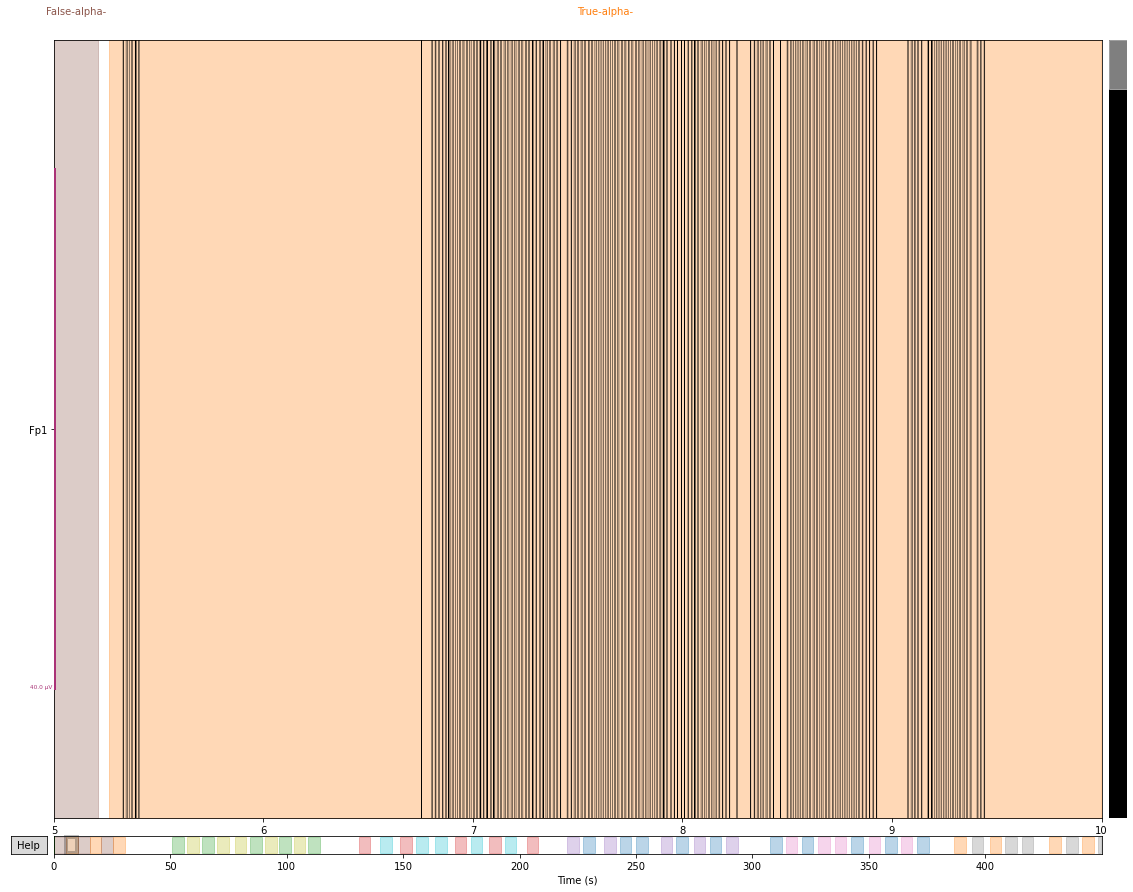

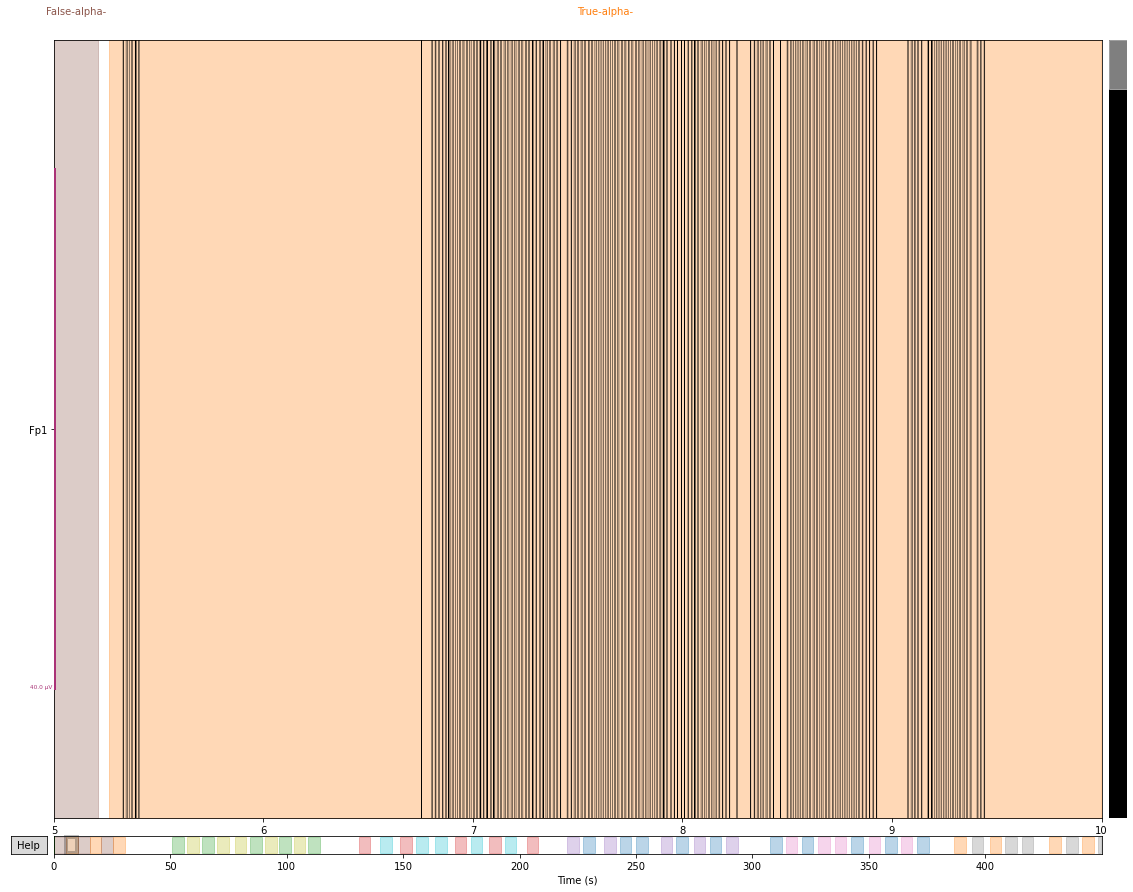

In [2]:
import mne
filepath = r"C:\Users\words\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-S-1.3-4-2021_raw.fif.gz"
# filepath = r"C:\Users\words\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-1.2-22-2021_raw.fif.gz"
data = mne.io.read_raw_fif(filepath, preload=True)
data.plot(start=5, duration=5, n_channels=1)

In [3]:
data = data.crop(2)

In [4]:
data = data.filter(5, 50)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (1.651 sec)



In [5]:
[i["description"] for i in data.annotations]

['False-alpha-',
 'True-alpha-',
 'False-alpha-',
 'True-alpha-',
 'False-alpha-',
 'True-alpha-',
 'False-SSVEP-',
 'True-SSVEP-',
 'False-SSVEP-',
 'True-SSVEP-',
 'True-SSVEP-',
 'False-SSVEP-',
 'True-SSVEP-',
 'False-SSVEP-',
 'True-SSVEP-',
 'False-SSVEP-',
 'False-TMI-a-',
 'True-TMI-a-',
 'False-TMI-a-',
 'True-TMI-a-',
 'True-TMI-a-',
 'False-TMI-a-',
 'True-TMI-a-',
 'False-TMI-a-',
 'True-TMI-a-',
 'False-TMI-a-',
 'False-TMI-i-',
 'True-TMI-i-',
 'False-TMI-i-',
 'True-TMI-i-',
 'True-TMI-i-',
 'False-TMI-i-',
 'True-TMI-i-',
 'False-TMI-i-',
 'True-TMI-i-',
 'False-TMI-i-',
 'False-LMI-a-',
 'True-LMI-a-',
 'False-LMI-a-',
 'True-LMI-a-',
 'True-LMI-a-',
 'False-LMI-a-',
 'True-LMI-a-',
 'False-LMI-a-',
 'True-LMI-a-',
 'False-LMI-a-',
 'False-LMI-i-',
 'True-LMI-i-',
 'False-LMI-i-',
 'True-LMI-i-',
 'True-LMI-i-',
 'False-LMI-i-',
 'True-LMI-i-',
 'False-LMI-i-',
 'True-LMI-i-']

In [6]:
data.ch_names

['Fp1',
 'Fp2',
 'CP1',
 'CP2',
 'FC1',
 'FC2',
 'O1',
 'O2',
 'F7',
 'F8',
 'Fz',
 'Cz',
 'T3',
 'T4',
 'P3',
 'P4']

In [7]:
events, eventid = mne.events_from_annotations(data, regexp='False-SSVEP.*')
picks = mne.pick_types(data.info, eeg=True)

f1_epochs = mne.Epochs(data, events, tmin=0, tmax=5, picks=picks, preload=True, baseline=None)

events, eventid = mne.events_from_annotations(data, regexp='True-SSVEP.*')
f2_epochs = mne.Epochs(data, events, tmin=0, tmax=5, picks=picks, preload=True, baseline=None)

Used Annotations descriptions: ['False-SSVEP-']
Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
Loading data for 5 events and 5001 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['True-SSVEP-']
Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
Loading data for 5 events and 5001 original time points ...
0 bad epochs dropped


In [8]:
f1_epochs[0]

<Epochs |  1 events (all good), 0 - 5 sec, baseline off, ~674 kB, data loaded,
 '1': 1>

In [9]:
channels = ["O1", "O2"]#, "P3", "P4"]

In [10]:
from scipy.signal import spectrogram
import numpy as np



f1_specs = []
f1_fs = []
f1_ts = []

for x in range(len(f1_epochs)):
    specs = []
    chnData = f1_epochs[x].pick_channels(channels).get_data()[0]
    for i in range(chnData.shape[0]):
        # frequency, time, intensity (shape fxt)
        f1_f, f1_t, c_spec = spectrogram(chnData[i,:],
                                            fs=1000,
                                            nperseg=2000,
                                            noverlap=115)
        specs.append(c_spec)

    f1_spec = np.mean(np.array(specs), axis=0)
    f1_specs.append(f1_spec)
    f1_fs.append(f1_f)
    f1_ts.append(f1_t)
    
    
f2_specs = []
f2_fs = []
f2_ts = []

for x in range(len(f1_epochs)):
    specs = []
    chnData = f2_epochs[x].pick_channels(channels).get_data()[0]
    for i in range(chnData.shape[0]):
        # frequency, time, intensity (shape fxt)
        f2_f, f2_t, c_spec = spectrogram(chnData[i,:],
                                            fs=1000,
                                            nperseg=1000,
                                            noverlap=115)
        specs.append(c_spec)

    f2_spec = np.mean(np.array(specs), axis=0)
    f2_specs.append(f2_spec)
    f2_fs.append(f2_f)
    f2_ts.append(f2_t)

In [11]:
 def plot_spectrogram(ts, fs, spec, savefig=False, filename=None):
        """Plots a spectrogram of FFT.
        Parameters
        ----------
        ts : np.array
            timestamps in seconds
        fs : np.array
            frequencies in Hz
        spec : np.array
            spectrogram (FFT magnitudes)
        savefig : boolean
            Whether to save the figure to disk.
        filename : str
            File name of the saved image.
        """
        f = plt.figure(figsize=(5, 5))
        plt.pcolormesh(ts, fs, spec, shading='gouraud')
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.ylim([5, 50])
        plt.colorbar()
        plt.tight_layout()
        plt.show()
        if savefig:
            if filename is None:
                filename = 'saved_plot.png'

            plt.savefig(filename)

In [12]:
import matplotlib.pyplot as plt

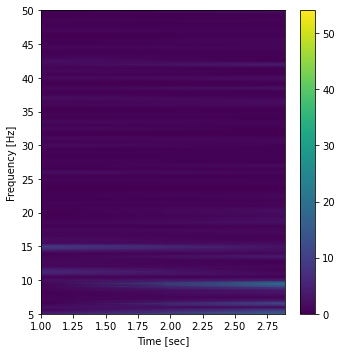

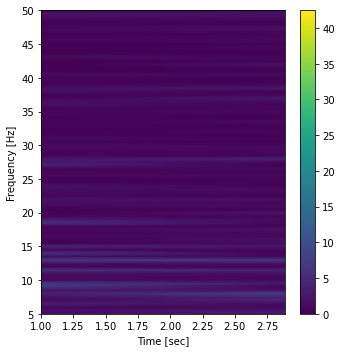

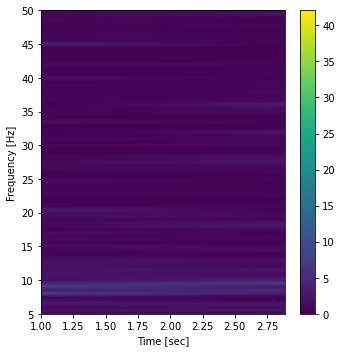

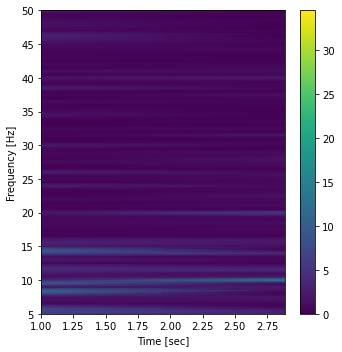

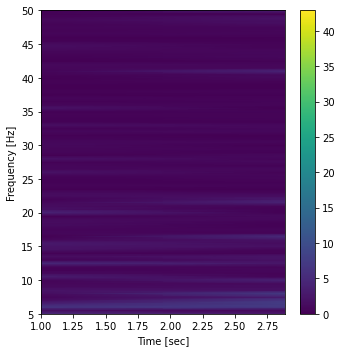

In [13]:
for z in range(len(f1_specs)):
    plot_spectrogram(f1_ts[z], f1_fs[z], f1_specs[z])

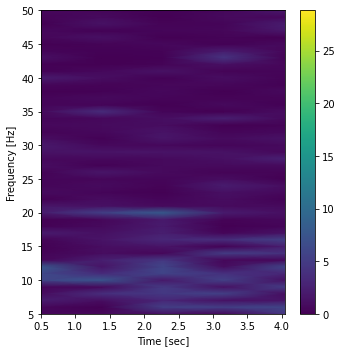

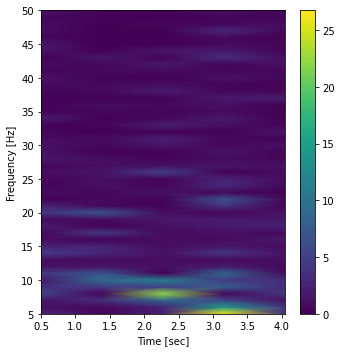

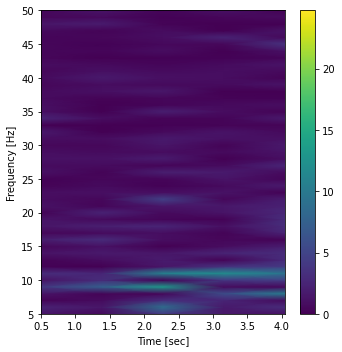

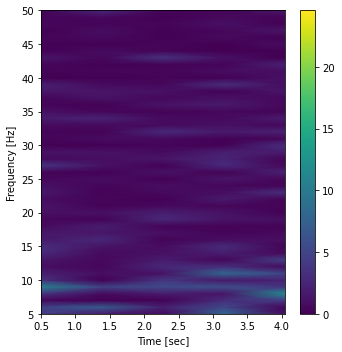

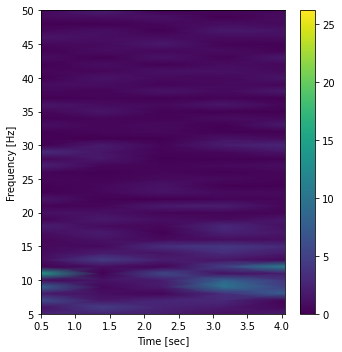

In [14]:
for z in range(len(f2_specs)):
    plot_spectrogram(f2_ts[z], f2_fs[z], f2_specs[z])

# using data processing module

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is EC72-15B6

 Directory of C:\Users\words\github\openbci_laryngeal_imagery\code

02/18/2021  01:08 PM    <DIR>          .
02/18/2021  01:08 PM    <DIR>          ..
02/18/2021  01:08 PM    <DIR>          .ipynb_checkpoints
12/16/2020  02:33 PM    <DIR>          __pycache__
02/18/2021  01:04 PM            38,014 data_collection.py
02/18/2021  01:08 PM         3,980,534 Data_Processing.ipynb
12/16/2020  02:09 PM               958 make_video.py
12/16/2020  02:09 PM             3,045 ml_test.py
12/16/2020  02:09 PM           221,504 MNE CSP example.ipynb
01/30/2021  05:52 PM            11,981 Modularized_Data_Processing.py
12/16/2020  02:09 PM            12,029 ssvep_analysis.py
01/11/2021  11:24 AM             5,297 Testing Data Processing.ipynb
               8 File(s)      4,273,362 bytes
               4 Dir(s)  75,835,871,232 bytes free


In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [16]:
import Modularized_Data_Processing as mdp 

In [17]:
# filepath1 = r"C:\Users\words\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-1.2-11-2021_raw.fif.gz"
# filepath = r"C:\Users\words\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-2.2-11-2021_raw.fif.gz"
data = mdp.load_data(filepath)

Opening raw data file C:\Users\words\OneDrive - Regis University\laryngeal_bci\data\fifs\BCIproject_trial-S-1.3-4-2021_raw.fif.gz...
    Range : 0 ... 449998 =      0.000 ...   449.998 secs
Ready.
Reading 0 ... 449998  =      0.000 ...   449.998 secs...


In [25]:
#['O1', 'O2', 'P3', 'P4']
# data.plot(scalings='auto', order=[6, 7, 14, 15], n_channels=4)

In [24]:
# data.plot(scalings='auto')

In [20]:
f1, f2 = mdp.get_epochs('SSVEP', orig_data=data, channels=['O1', 'O2'], nperseg=2000, noverlap=1800)

Used Annotations descriptions: ['False-SSVEP-']
Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
Loading data for 5 events and 5001 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['True-SSVEP-']
Not setting metadata
Not setting metadata
5 matching events found
No baseline correction applied
0 projection items activated
Loading data for 5 events and 5001 original time points ...
0 bad epochs dropped
true_found is: True


In [21]:
f1.specs[1].min()

0.00021066417163086797

In [22]:
f1.specs[1].max()

7793.231947227914

In [23]:
f2.specs[1].max()

7584.041174060407

In [26]:
fs = f1.fs[i]

<IPython.core.display.Javascript object>


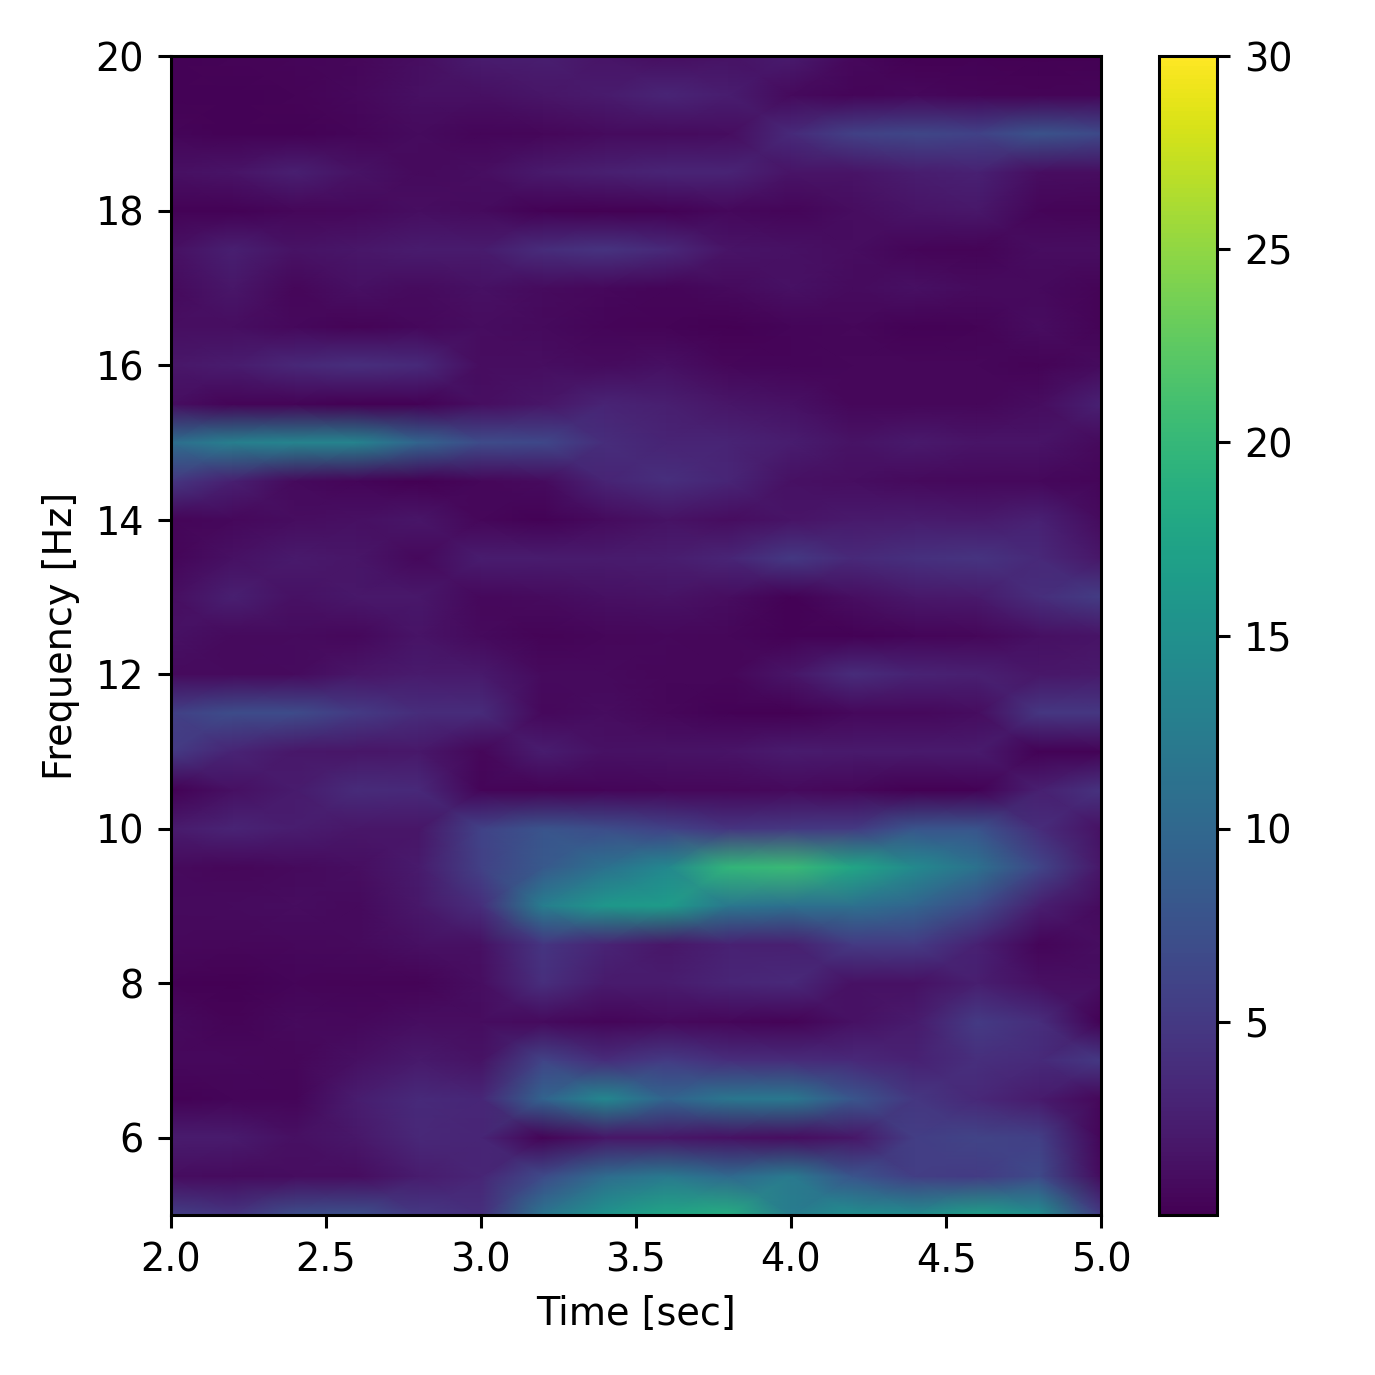

<IPython.core.display.Javascript object>


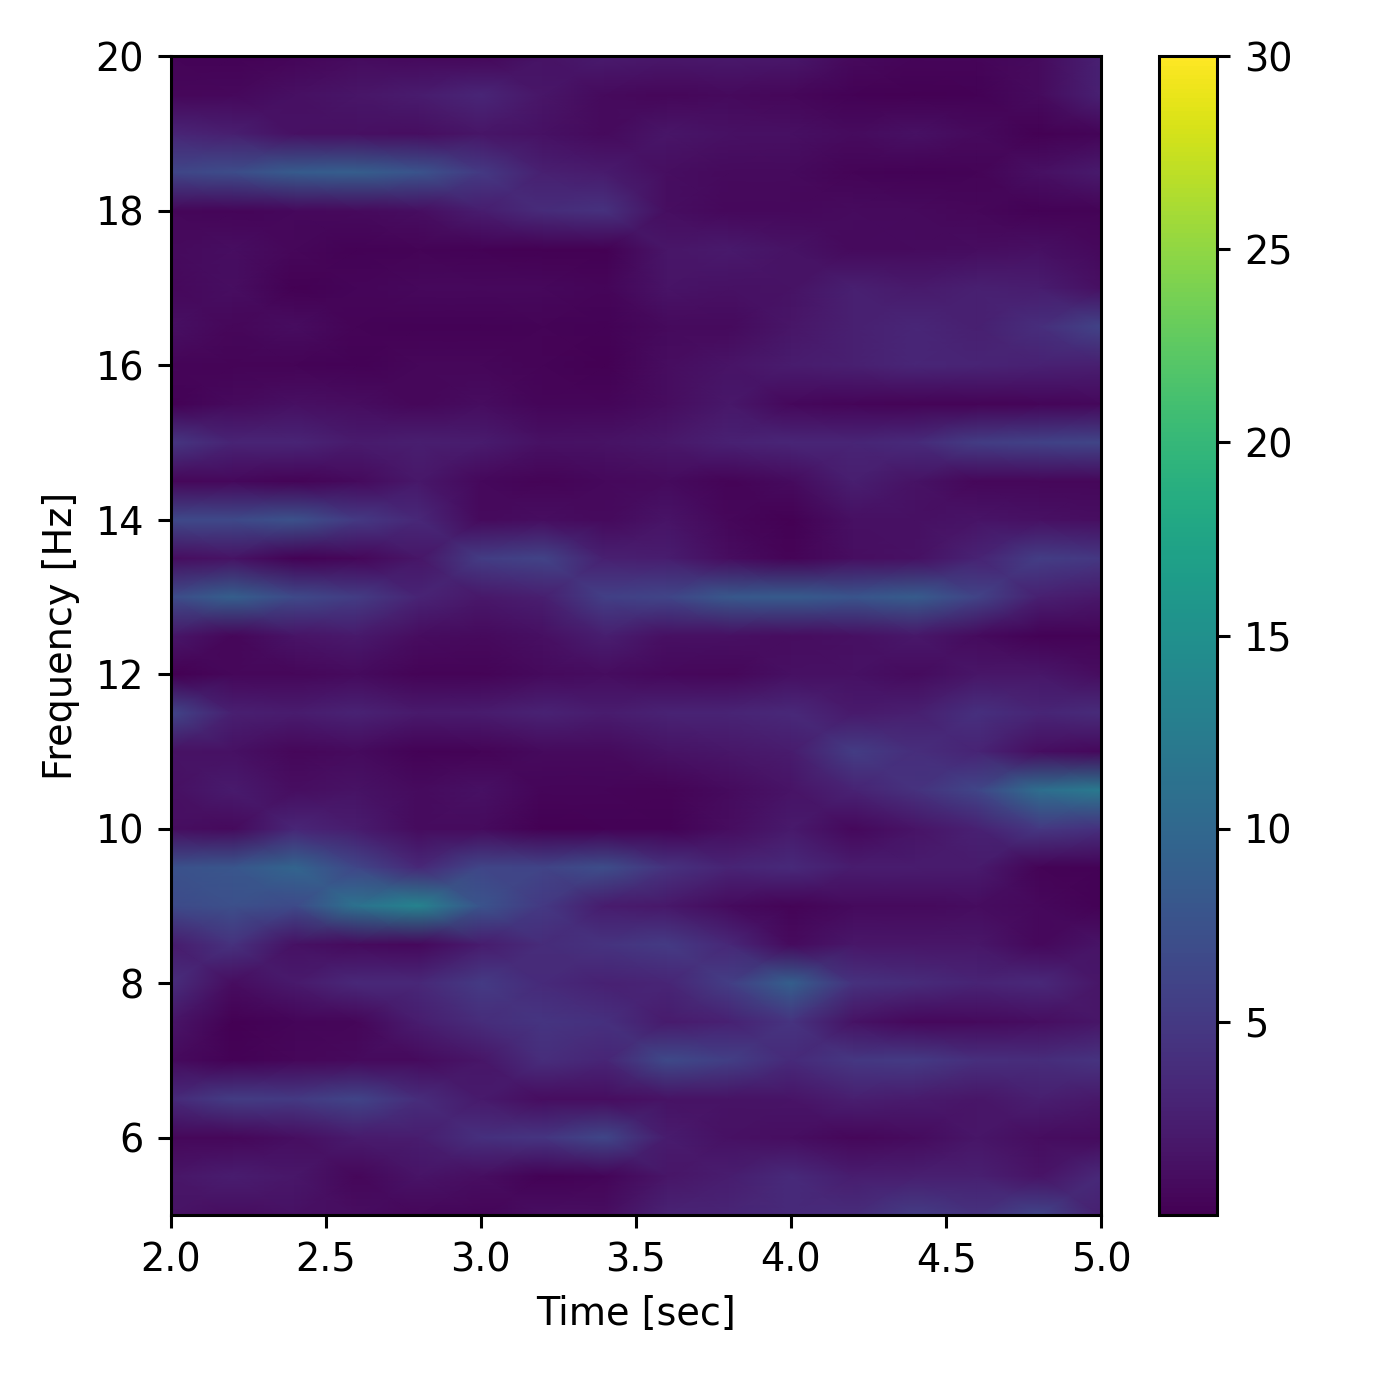

<IPython.core.display.Javascript object>


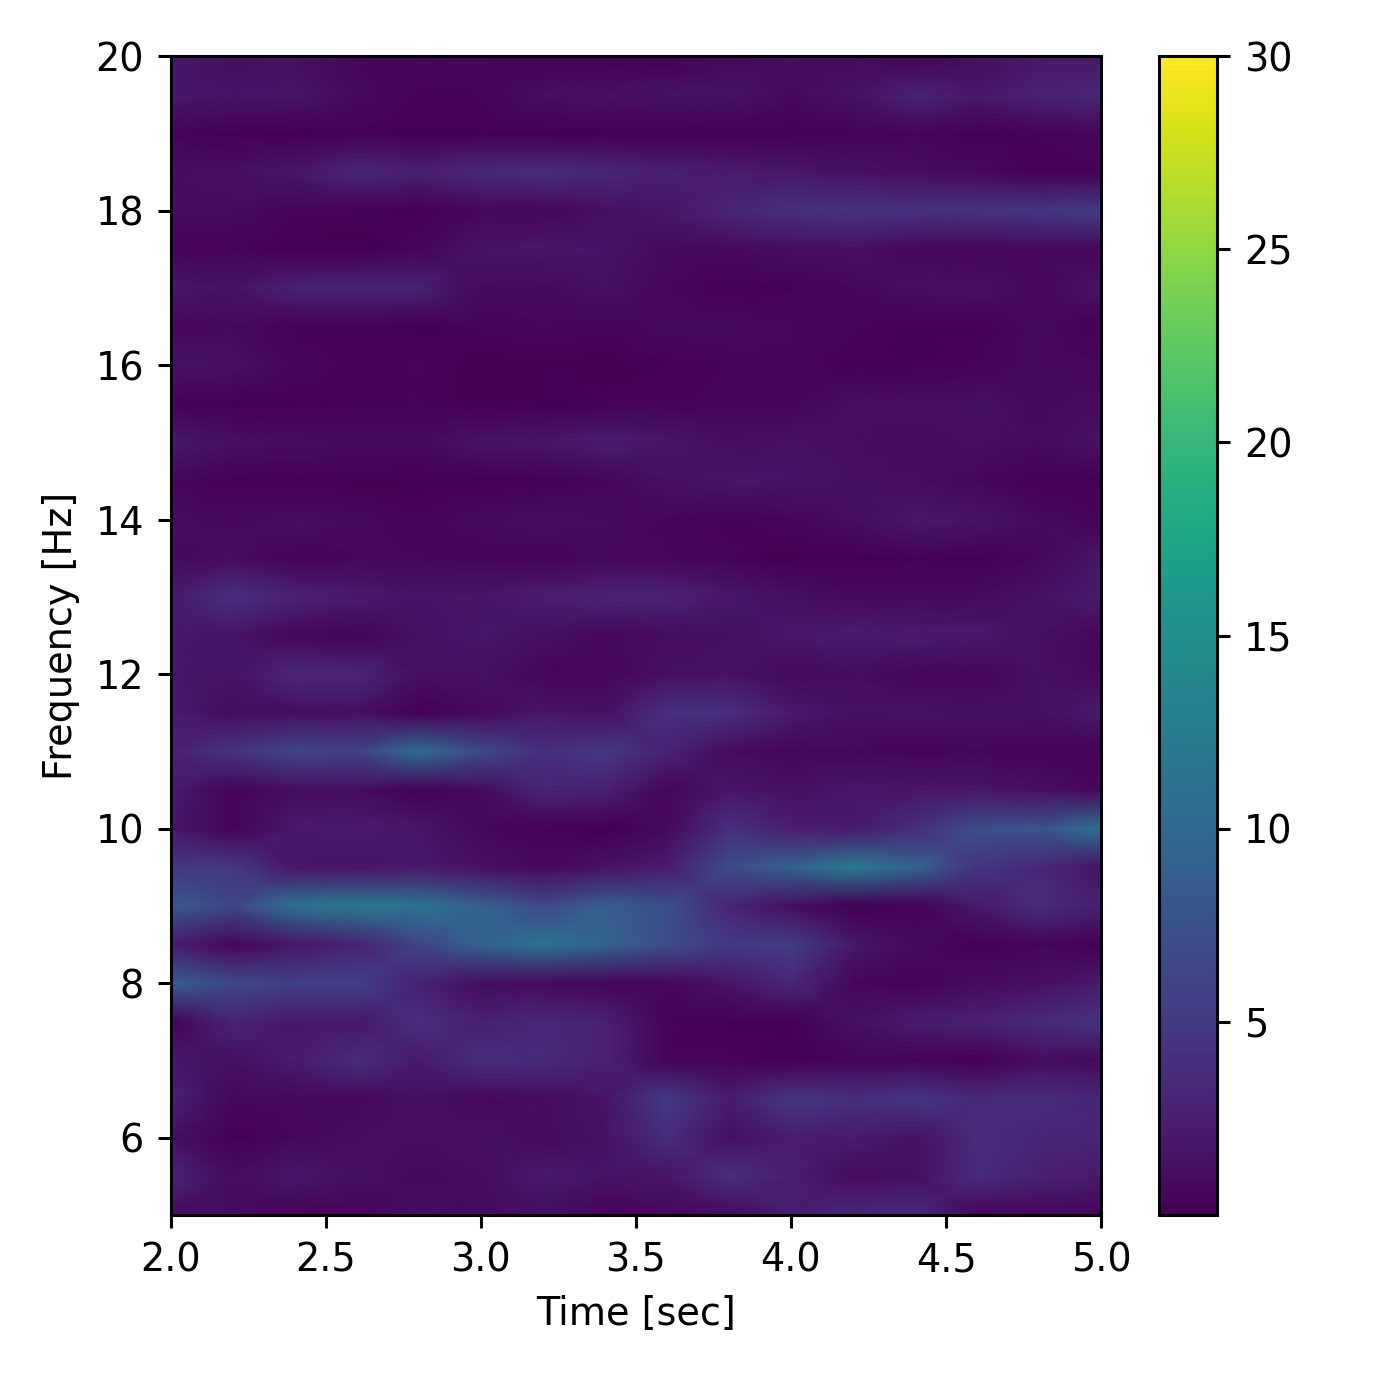

<IPython.core.display.Javascript object>


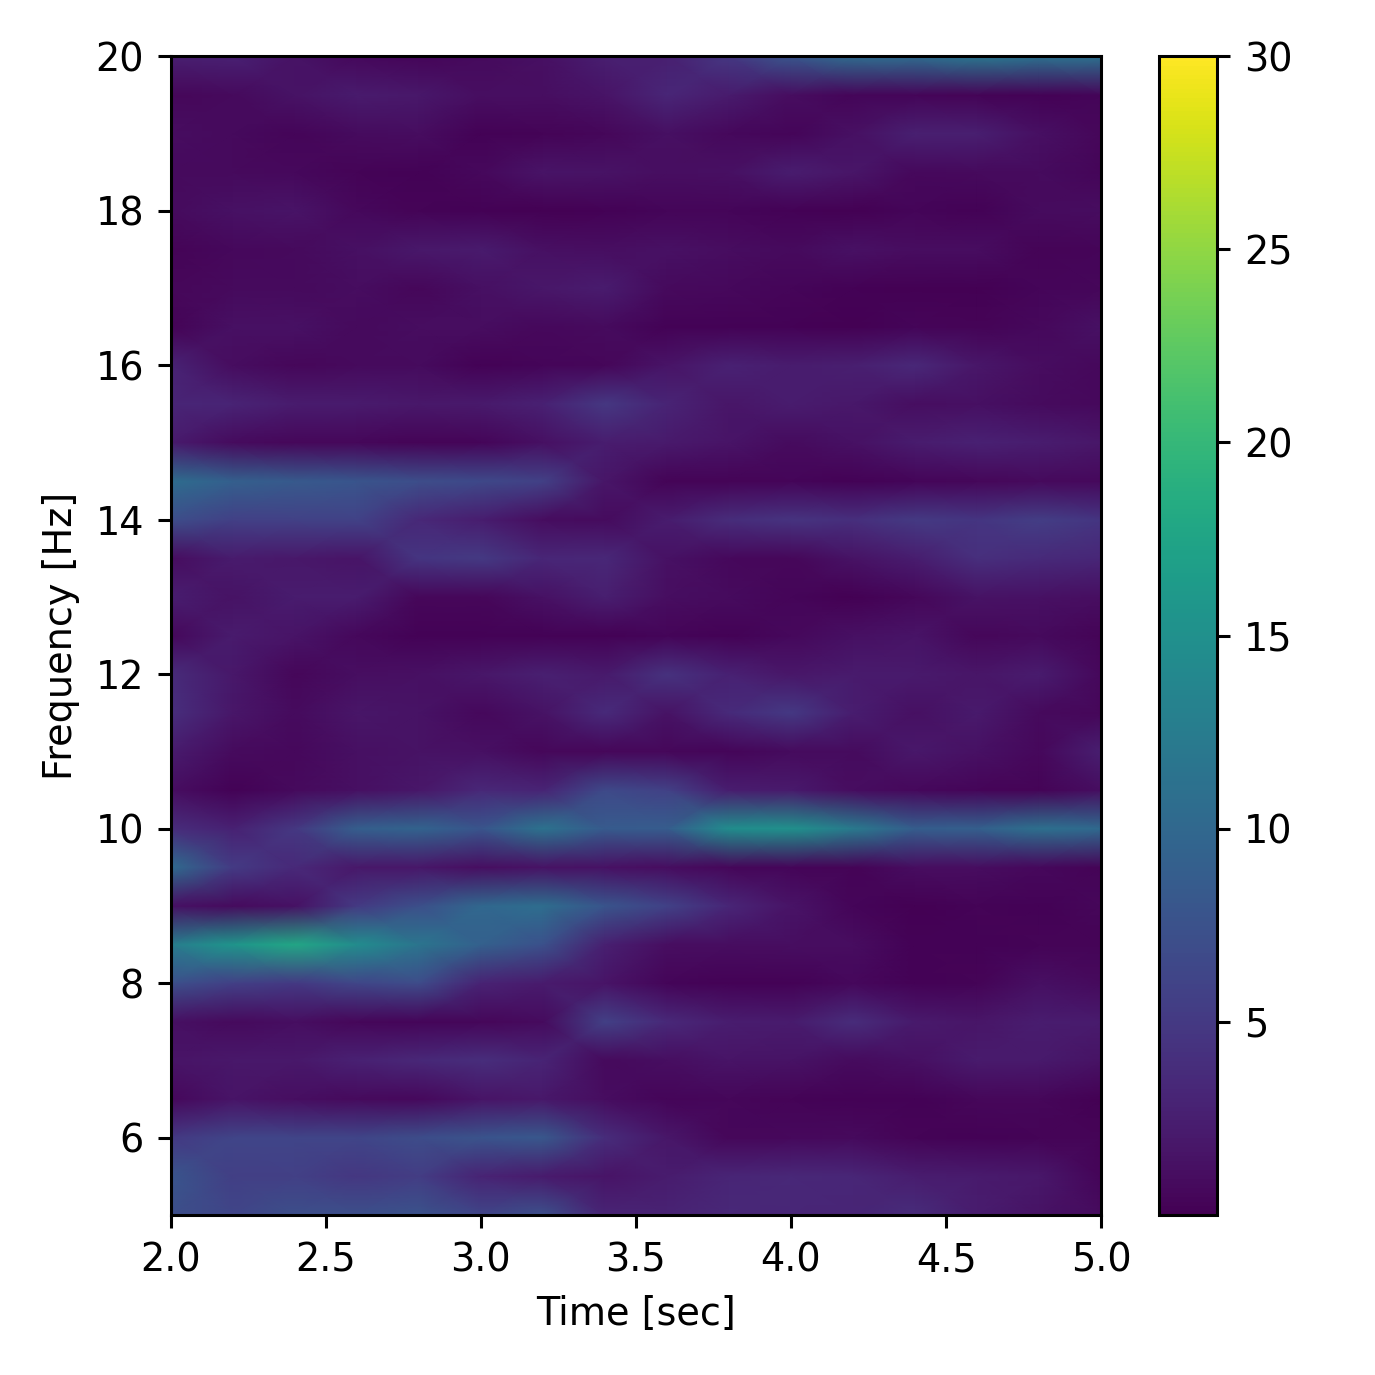

<IPython.core.display.Javascript object>


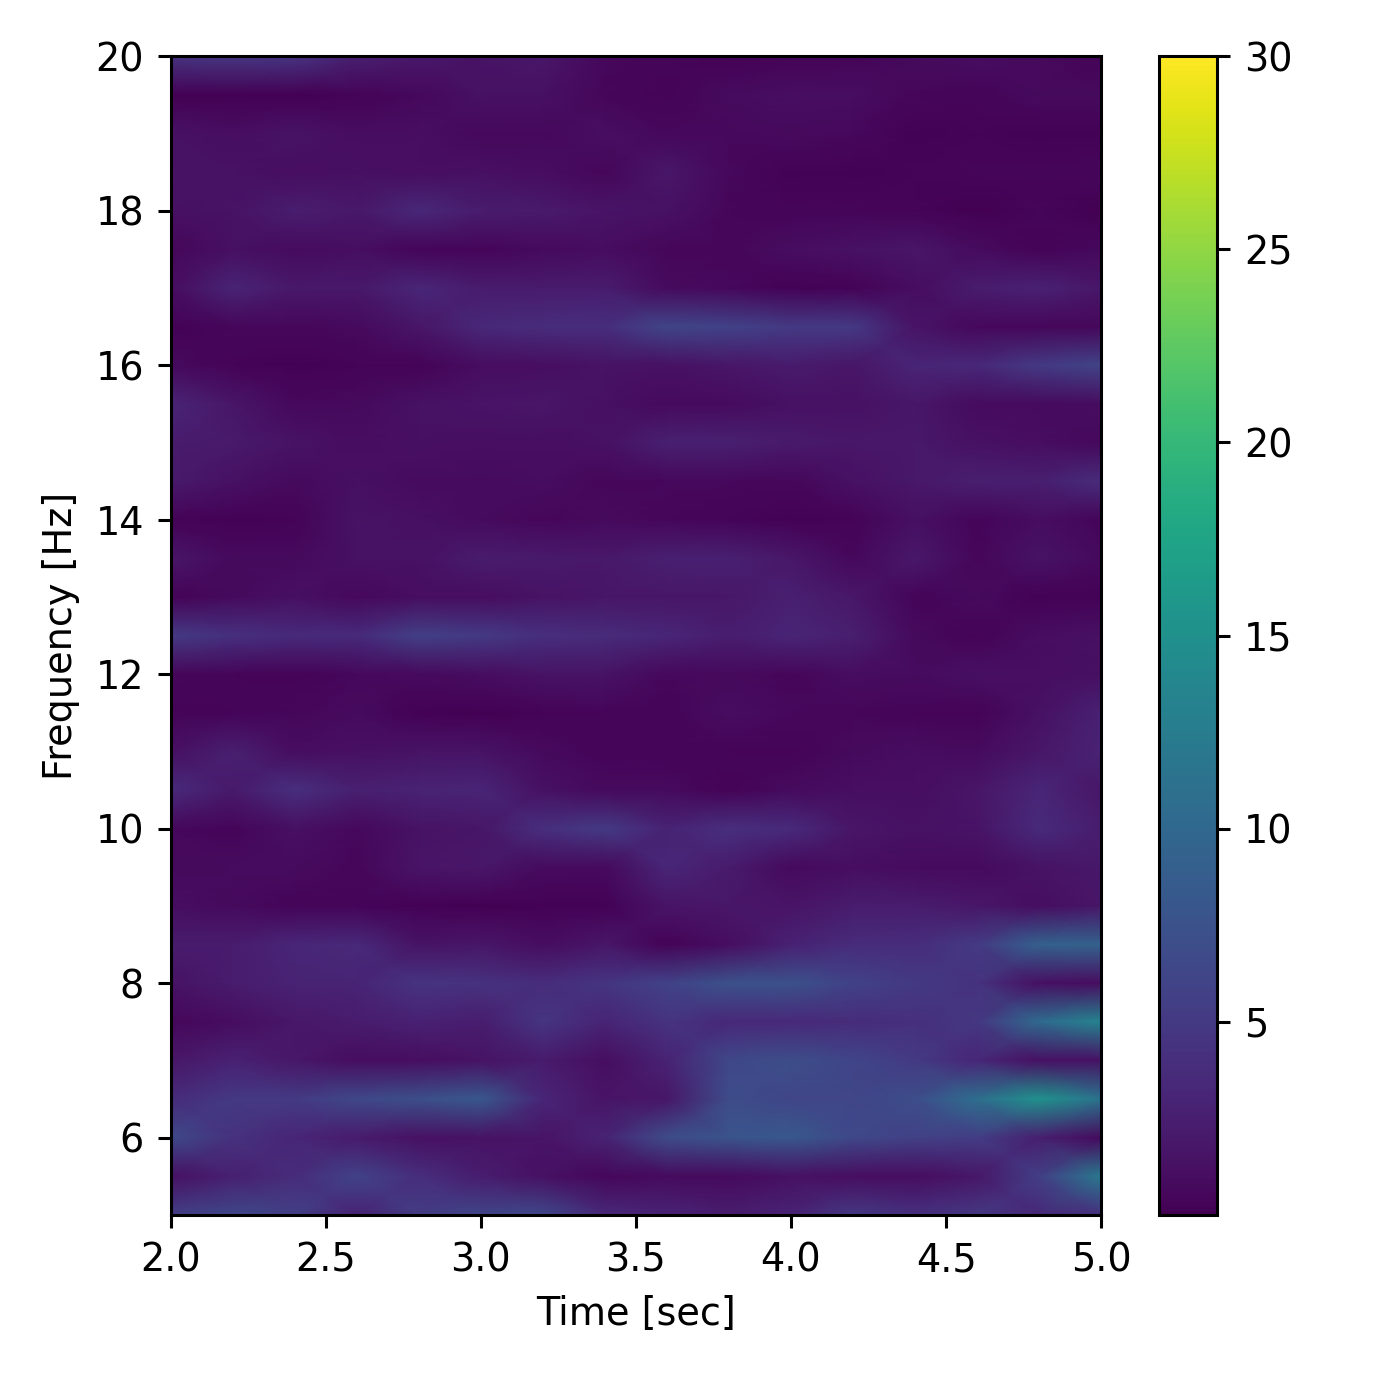

In [29]:
for i in range(5):
    mdp.plot_spectrogram(f1.ts[i], f1.fs[i], f1.specs[i], ylim=[5, 20], vmax=30)

<IPython.core.display.Javascript object>


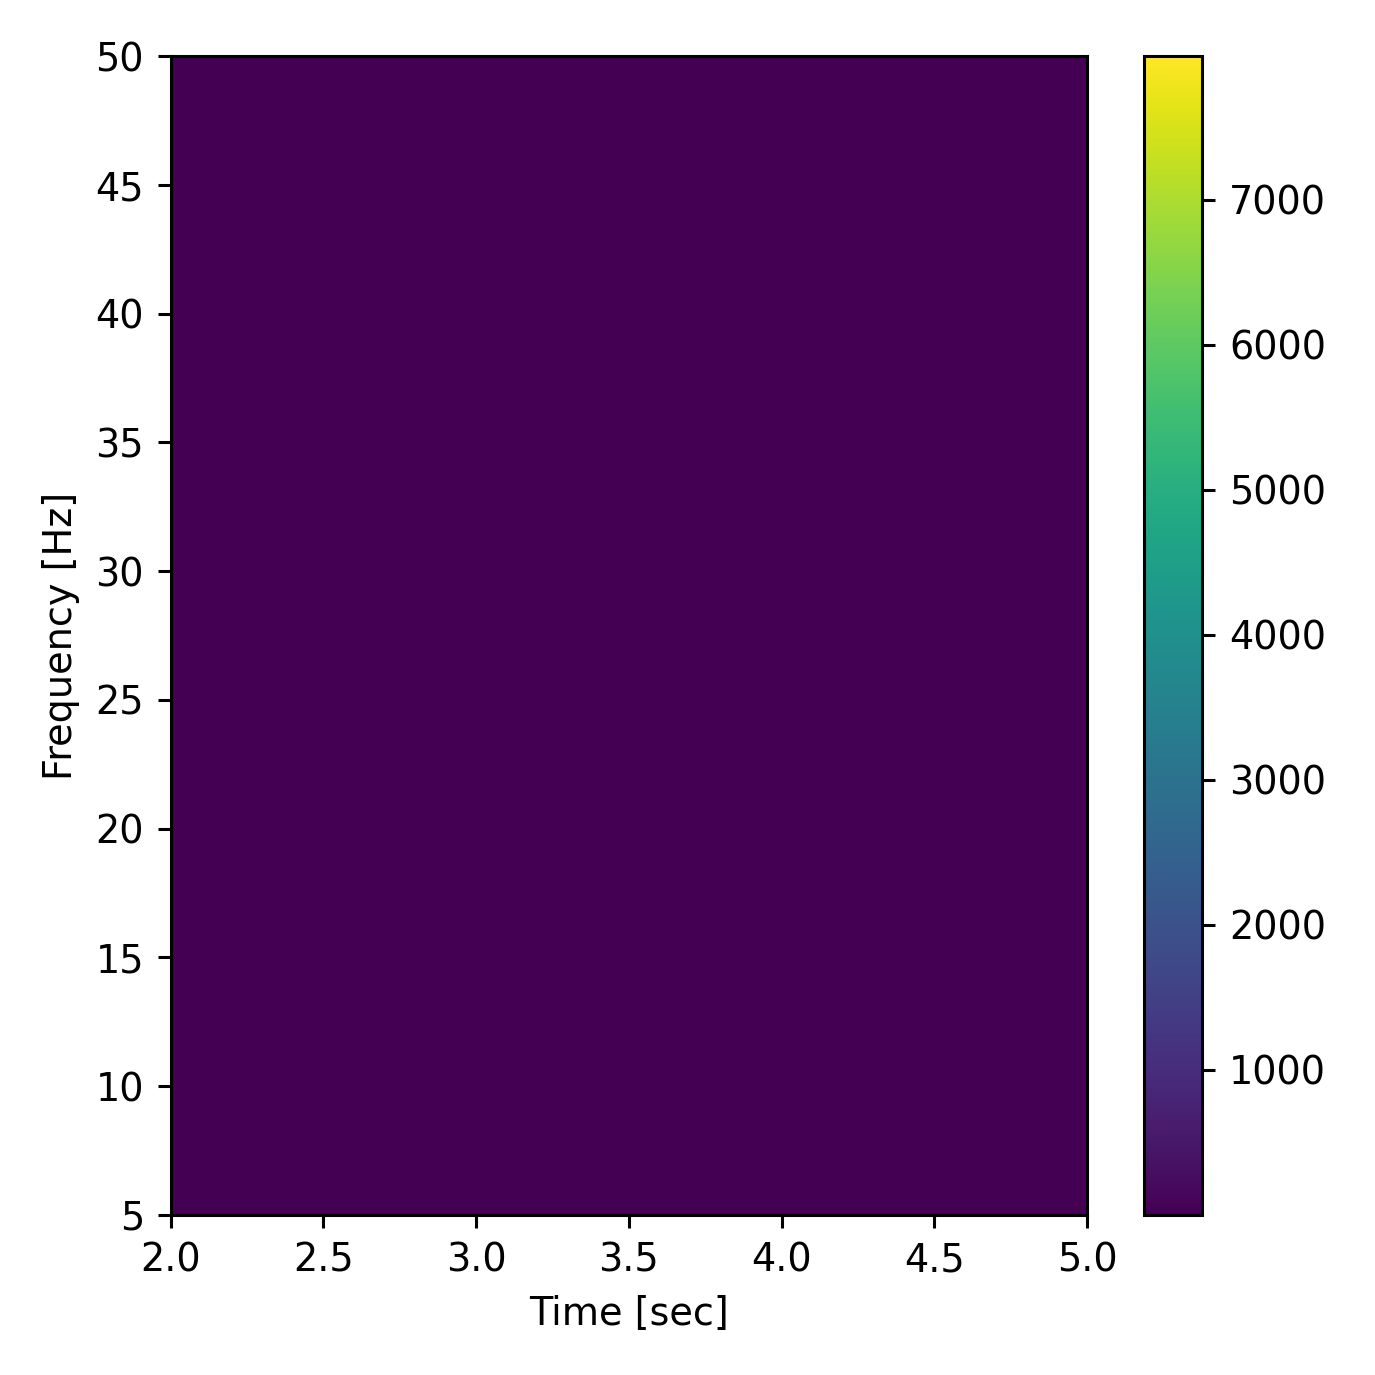

<IPython.core.display.Javascript object>


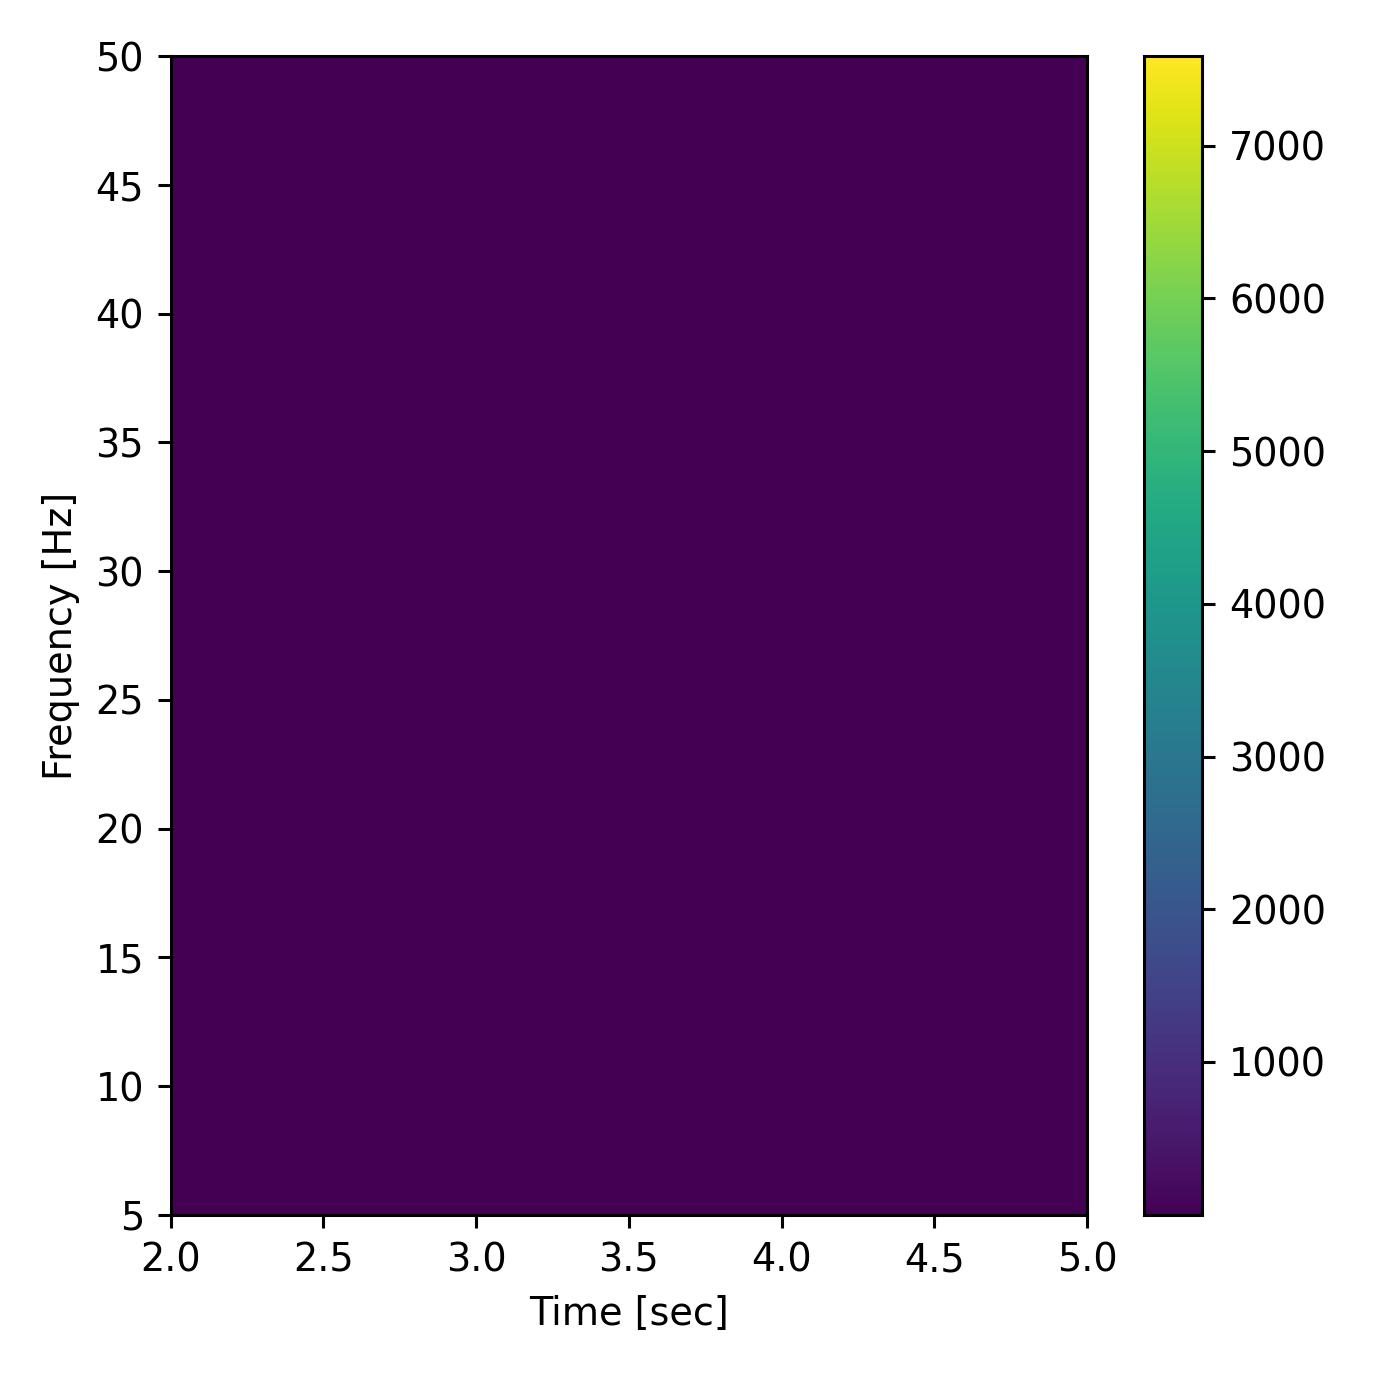

<IPython.core.display.Javascript object>


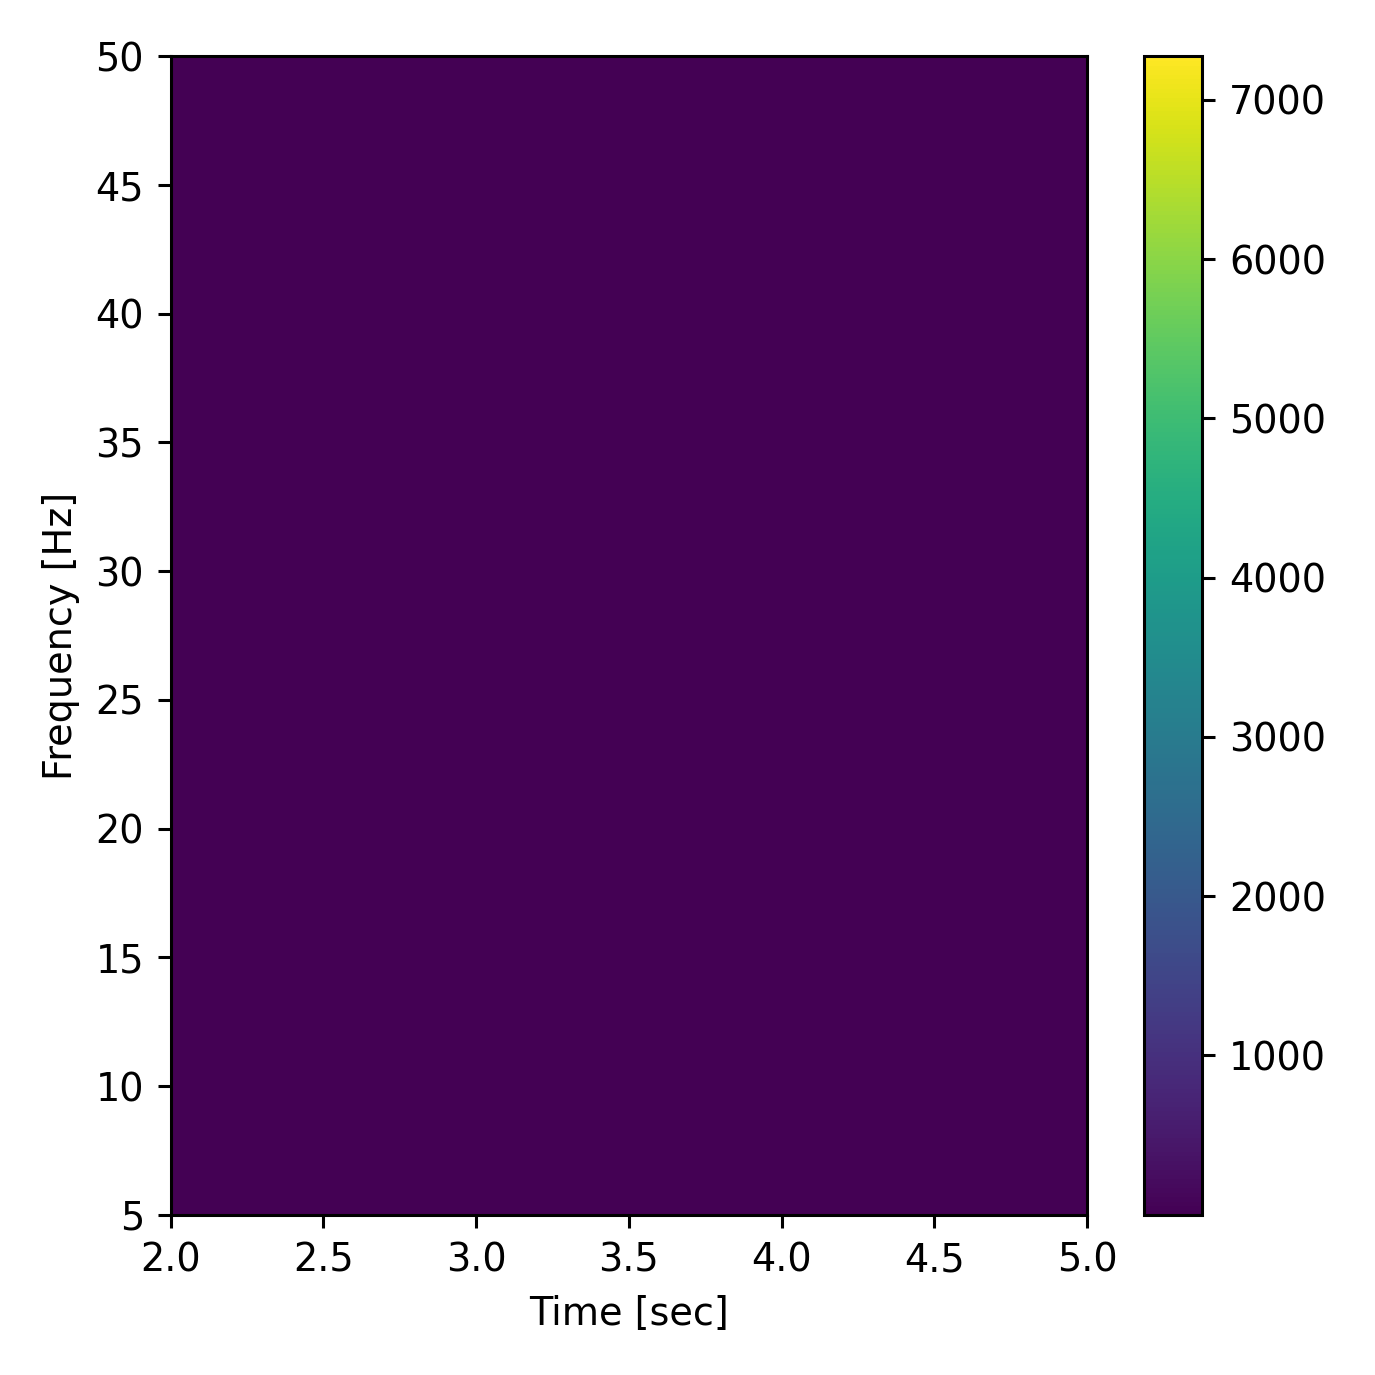

<IPython.core.display.Javascript object>


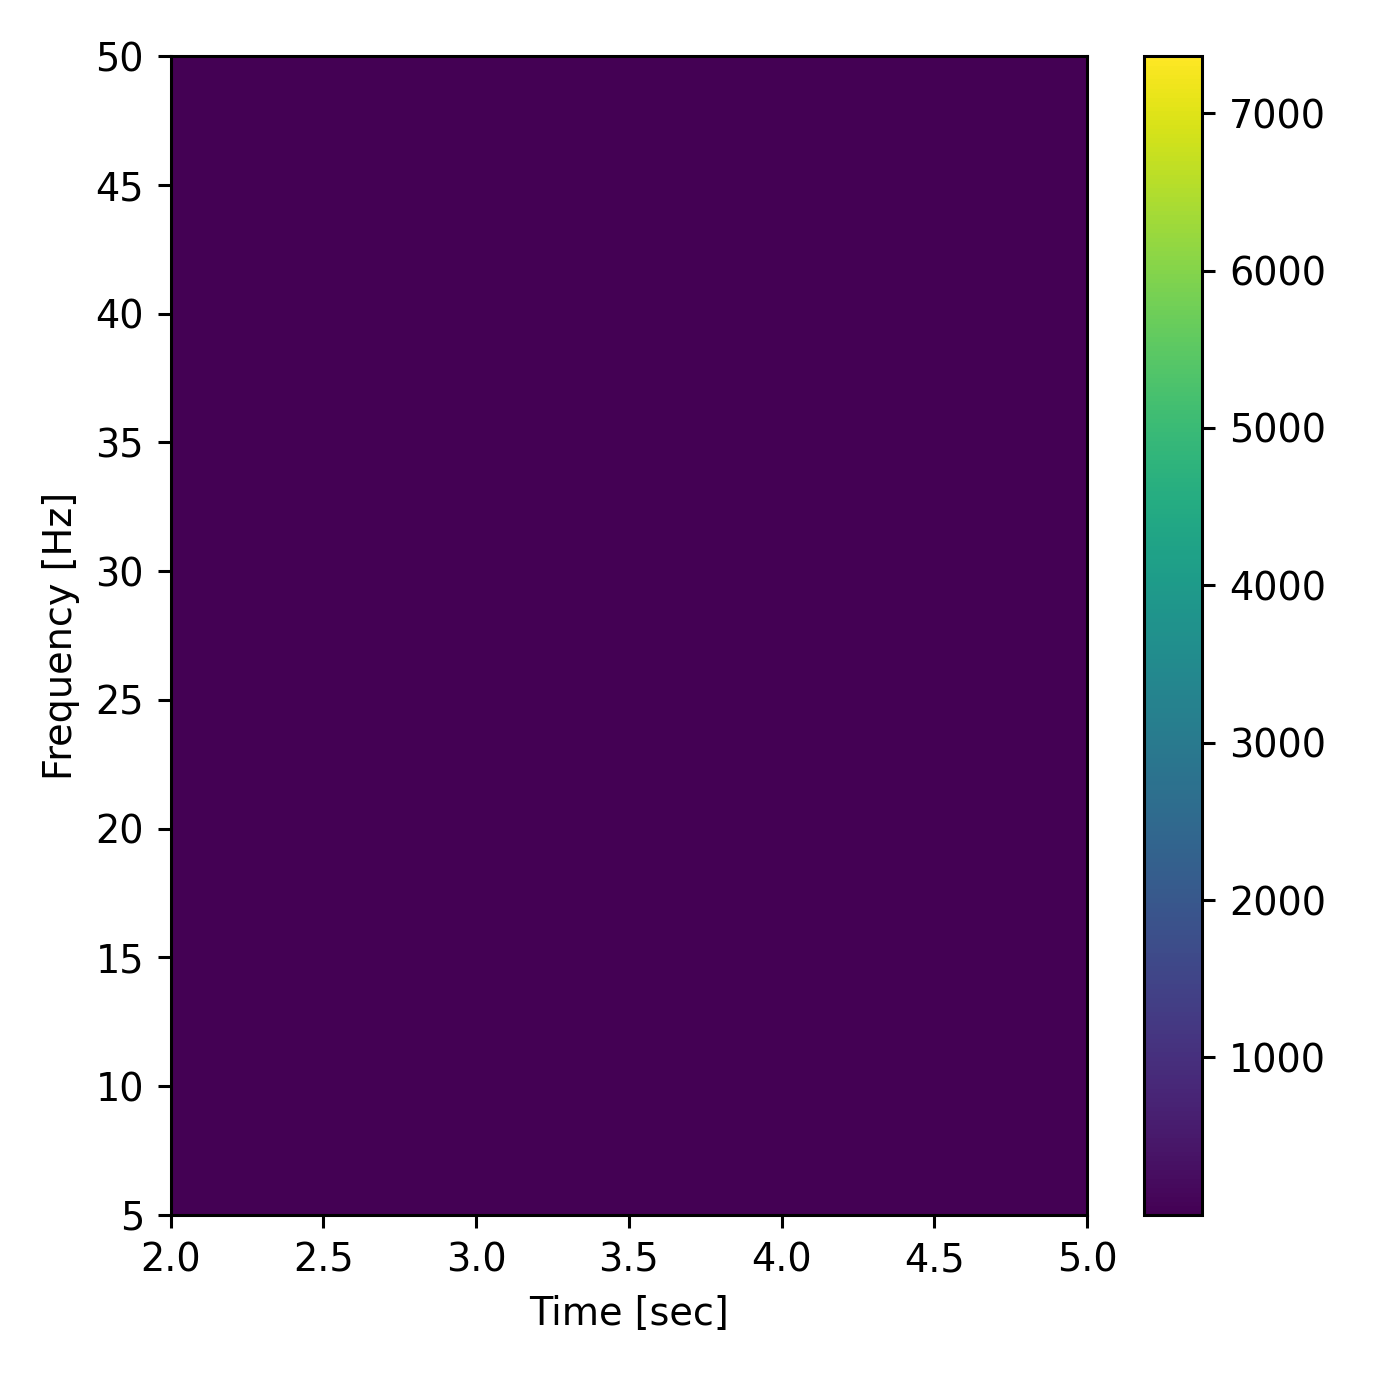

<IPython.core.display.Javascript object>


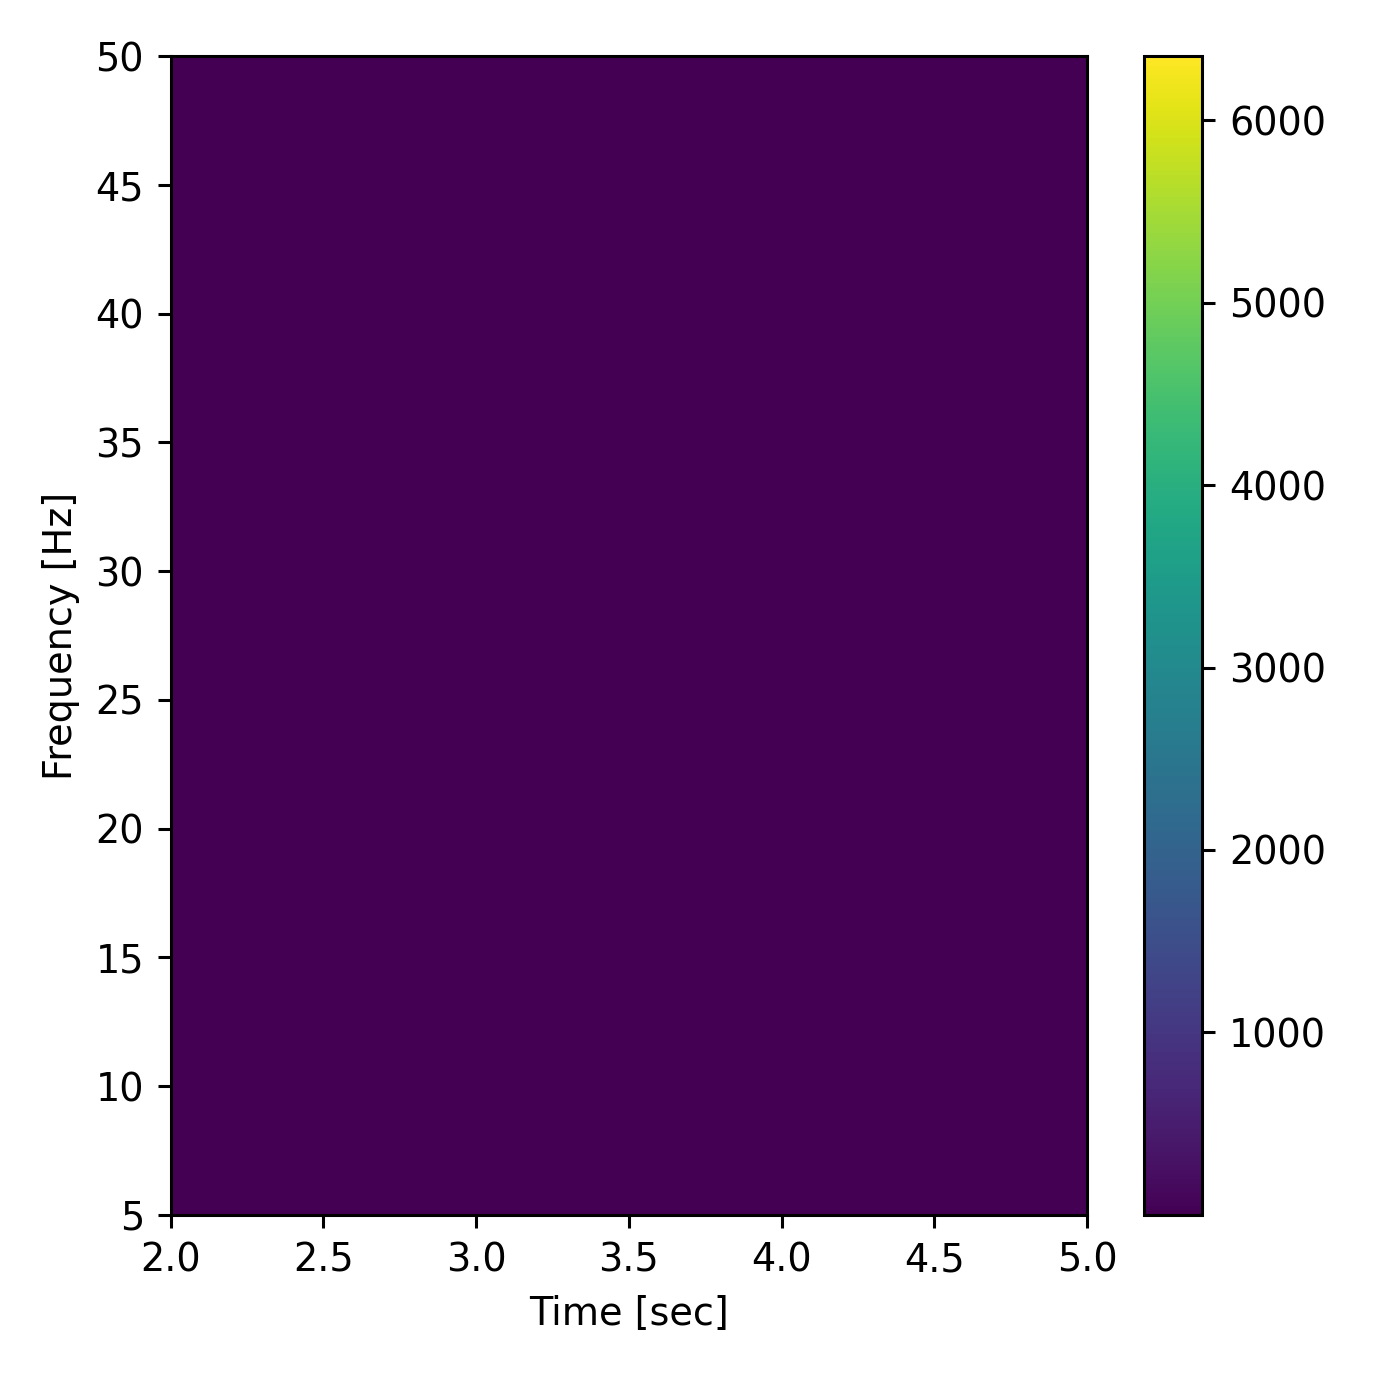

In [28]:
for i in range(5):
    mdp.plot_spectrogram(f2.ts[i], f2.fs[i], f2.specs[i])